In [30]:
from sktime.forecasting.arima import AutoARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "./data/sample.xlsx"
df = pd.read_excel(path, sheet_name = 'Hoja1')

In [76]:
df

,FECHA,OLEO CANOLA 500 ML (BOTELLAS),TAPA AZUL,TARROS,ETIQUETAS
0,2019-01-01,84,84,84,168
1,2019-01-08,74,74,74,148
2,2019-01-15,72,72,72,144
3,2019-01-22,95,95,95,190
4,2019-01-29,86,86,86,172
...,...,...,...,...,...
95,2020-10-27,187,187,187,374
96,2020-11-03,172,172,172,344
97,2020-11-10,194,194,194,388
98,2020-11-17,171,171,171,342


# 2. Add White Noise to MRP Timeseries

In [78]:
df['TAPA AZUL'] / df['OLEO CANOLA 500 ML (BOTELLAS)']

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
     ... 
95    1.0
96    1.0
97    1.0
98    1.0
99    1.0
Length: 100, dtype: float64

<AxesSubplot:>

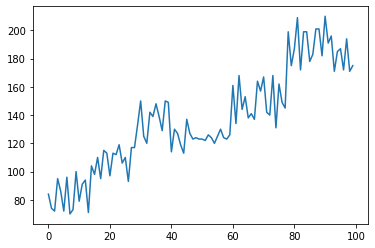

In [79]:
df['TAPA AZUL'].plot()

In [23]:
std_ratio_mrp_1 = 4
std_ratio_mrp_2 = 5
std_ratio_mrp_3 = 4.4
n = len(df['TAPA AZUL'])

mps = df['OLEO CANOLA 500 ML (BOTELLAS)'].values

mrp_1 = df['TAPA AZUL'].values + np.random.normal(0, (std_ratio_mrp_1)**2, n)
mrp_2 = df['TARROS'].values + np.random.normal(0, (std_ratio_mrp_2)**2, n)
mrp_3 = df['ETIQUETAS'].values + np.random.normal(0, (std_ratio_mrp_3)**2, n)

In [27]:
ratio_mrp_1 = mrp_1 / mps 
ratio_mrp_2 = mrp_2 / mps 
ratio_mrp_3 = mrp_3 / mps 


In [37]:
df.columns

Index(['FECHA', 'OLEO CANOLA 500 ML (BOTELLAS)', 'TAPA AZUL', 'TARROS',
       'ETIQUETAS'],
      dtype='object')

In [68]:
days = df['FECHA'].apply(lambda x: x.strftime("%Y-%m-%d"))

/tmp/ipykernel_2058/2509293891.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(days, rotation = 70)


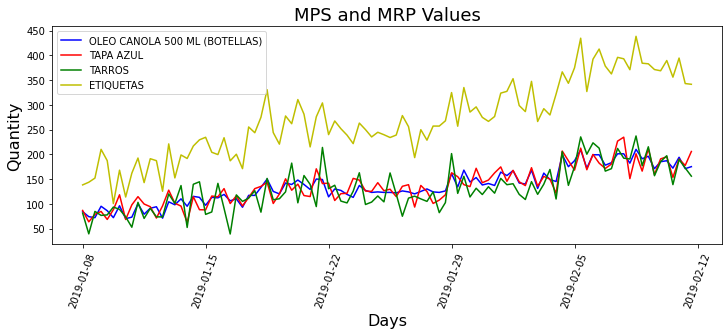

In [69]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(mps, color="b", label = df.columns[1])
ax.plot(mrp_1, color="r", label = df.columns[2])
ax.plot(mrp_2, color="g", label = df.columns[3])
ax.plot(mrp_3, color="y", label = df.columns[4])
ax.legend()
ax.set_title(f'MPS and MRP Values', fontsize=18)
ax.set_xticklabels(days, rotation = 70)
ax.set_ylabel('Quantity', fontsize=16)
ax.set_xlabel('Days', fontsize=16)
plt.show()

/tmp/ipykernel_2058/3695937441.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(days, rotation = 70)


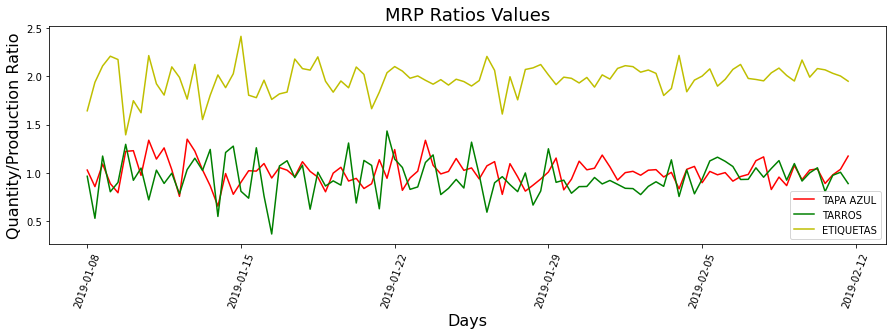

In [70]:
fig, ax = plt.subplots(figsize=(15,4))

default_x_ticks = range(len(ratio_mrp_1))

ax.plot(ratio_mrp_1, color="r", label = df.columns[2])
ax.plot(ratio_mrp_2, color="g", label = df.columns[3])
ax.plot(ratio_mrp_3, color="y", label = df.columns[4])
ax.legend()
ax.set_title(f'MRP Ratios Values', fontsize=18)
ax.set_ylabel('Quantity/Production Ratio', fontsize=16)
ax.set_xlabel('Days', fontsize=16)
ax.set_xticklabels(days, rotation = 70)
plt.show()

In [3]:
y = load_airline()
forecaster = AutoARIMA(sp=7, d=0, max_p=2, max_q=2, suppress_warnings=True)  
forecaster.fit(y) 
y_pred = forecaster.predict(fh=[1,2,3]) 

In [3]:
y_pred

1961-01    444.889177
1961-02    419.206848
1961-03    447.585620
Freq: M, dtype: float64

In [ ]:
timeseries = [mrp_1, mrp_2, mrp_3]

In [73]:
max_p = 4 # AR
max_q = 4 # MA
d = 0 # Differencing level
sp = 4 # Level of Seasonality

for ts in timeseries:
    
    forecaster = AutoARIMA(sp=sp, d=d, 
                            max_p=max_p, 
                            max_q=max_q, 
                            suppress_warnings=True)  
    forecaster.fit(mrp_1) 
    y_pred = forecaster.predict(fh=[1,2,3]) 